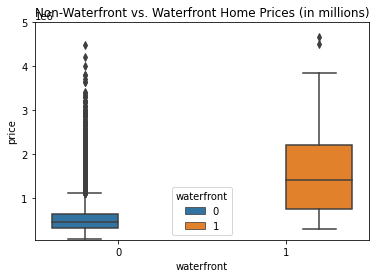

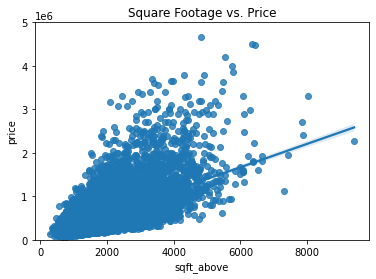

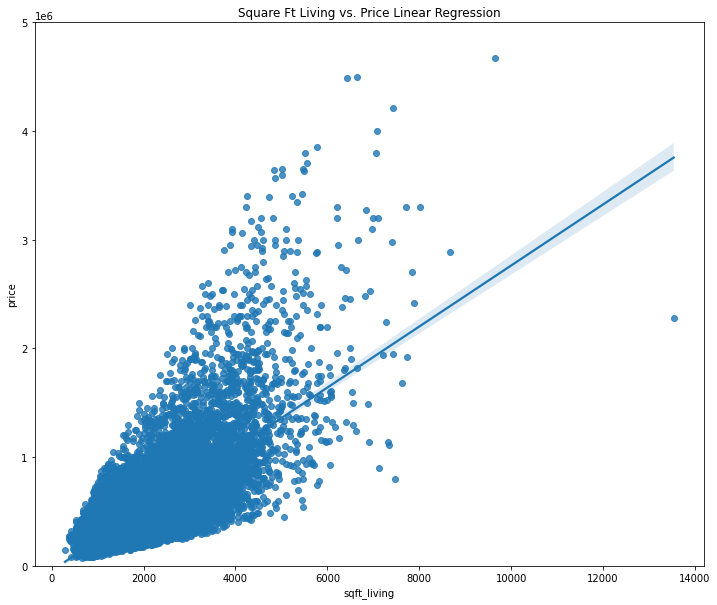

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


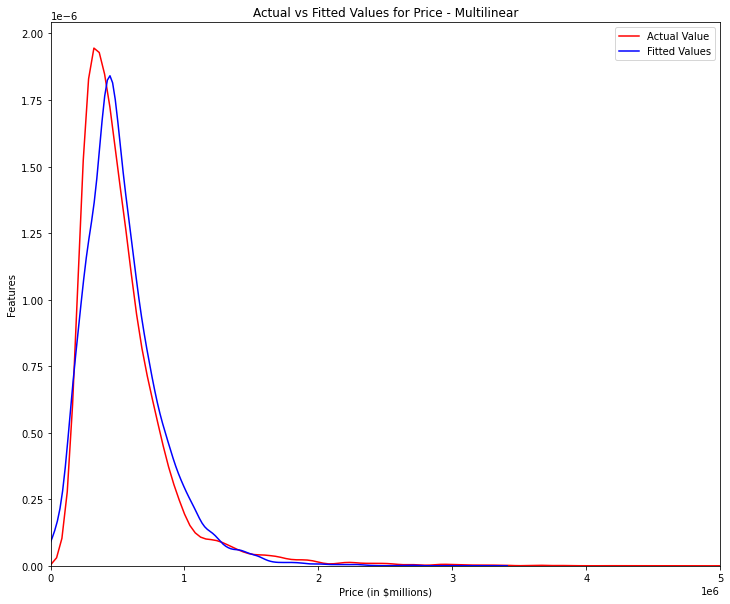

number of test samples: 3242
number of training samples: 18371
number of test samples: 3242
number of training samples: 18371
predicted: [651988.91913022 514600.42586645 794717.61036202 702449.28188995]
test set : [ 459000.  445000. 1057000.  732350.]
0.6478078664848206
number of test samples: 3242
number of training samples: 18371
predicted: [569063.68793247 489311.35557323 684542.55358916 688482.84917459]
test set : [ 459000.  445000. 1057000.  732350.]
0.6996769633961435


  1%|▏         | 13/1000 [00:14<17:48,  1.08s/it, Test Score=0.699, Train Score=0.74]/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.83426e-18): result may not be accurate.
  overwrite_a=True).T
  1%|▏         | 14/1000 [00:14<13:57,  1.18it/s, Test Score=0.699, Train Score=0.74]/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.61806e-17): result may not be accurate.
  overwrite_a=True).T
  2%|▏         | 15/1000 [00:15<11:46,  1.39it/s, Test Score=0.699, Train Score=0.74]/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.56676e-18): result may not be accurate.
  overwrite_a=True).T
  2%|▏         | 16/1000 [00:15<10:38,  1.54it/s, Test Score=0.699, Train Score=0.74]/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linea

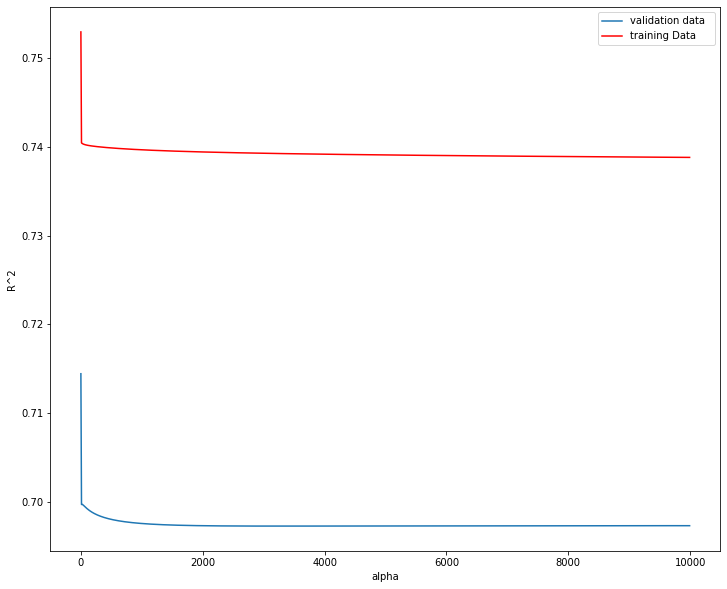

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from tqdm import tqdm

%matplotlib inline

file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

#remove missing data
missing_data = df.isnull()
avg_bedrooms = df['bedrooms'].astype("float").mean(axis=0)
df['bedrooms'].replace(np.nan, avg_bedrooms, inplace=True)

avg_bathrooms = df['bathrooms'].astype("float").mean(axis=0)
df['bathrooms'].replace(np.nan, avg_bathrooms, inplace=True)  

#Question 1
df.dtypes

#Question 2
df.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)
df.describe()

#Question 3
df.value_counts('floors').to_frame()

#Question 4
box = sns.boxplot(data=df, y=df.price, x=df.waterfront, hue =  df.waterfront)
box.set(ylim=(50000,5000000))
plt.title("Non-Waterfront vs. Waterfront Home Prices (in millions)")
plt.show()

#Question 5
reg = sns.regplot(x=df.sqft_above, y=df.price, data=df)
reg.set(ylim=(0,5000000))
plt.title("Square Footage vs. Price")
plt.show()

df.corr()['price'].sort_values()
#longitude is most closely correlated attibute to price
X = df[['long']]
Y = df['price']

lm = LinearRegression()
lm.fit(X,Y)
#lm.score(X,Y)
#R^2 = 0.000467

#Question 6 
A = df[['sqft_living']]
B = df[['price']]

lm = LinearRegression()
lm.fit(A,B)
#lm.score(A,B)
#R^2 = .49285
lm.coef_
#coefficient = 280.6235679
lm.intercept_
#intercept = -43580.74309447
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="sqft_living", y="price", data=df)
plt.ylim(0,5000000)
plt.title('Square Ft Living vs. Price Linear Regression')
plt.show()

#Question 7
lm = LinearRegression()
features =df[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]     

Y = df['price']

lm.fit(features,Y)
Yhat=lm.predict(features)
Yhat[0:5]
lm.score(features, Y)
#R^2 = 0.65767881
#lm.coef_
# coefficients =[-3.15405918e+04,  6.08049315e+05,  6.72837739e+05, -2.62398587e+04,-1.87931219e+15,  6.69772916e+04, -3.15172111e+03,  5.30082351e+00,-1.87931219e+15,  8.20267173e+04,  1.87931219e+15
#lm.intercept_
# intercept = -32378951.85823347
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price - Multilinear')
plt.ylabel('Features')
plt.xlabel('Price (in $millions)')
plt.xlim(0,5000000)
plt.legend(loc="upper right")
plt.show()

#Question 8 
lm = LinearRegression()  
Y = df['price']
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
features = features.astype(float)
pipe.fit(features,Y)
ypipe=pipe.predict(features)
ypipe[0:10]
#ypipe values = # 349625. ,  559001.5,  449424. ,  393324. ,  521671.5, 2035558. ,210350. ,  291358. ,  442489.5,  290637. ])
lm.fit(features, Y)
lm.score(features, Y)
#R^2 = 0.6576788153088797

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

#Question 9 
Y = df['price']
features =df[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']]     
X=features

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)
print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train, y_train)
yhat = RigeModel.predict(x_test)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

Ridge_r2 = RigeModel.score(x_test, y_test)
print(Ridge_r2)
#R^2 = 0.6478078664848206
#Question 10  
Y = df['price']
X=features

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']] )
x_test_pr = pr.fit_transform(x_test[['floors', 'waterfront','lat' ,'bedrooms' ,'sqft_basement' ,'view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']] )

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)
Ridge_r2 = RigeModel.score(x_test_pr, y_test)
print(Ridge_r2)
#R^2 = 0.69967696339

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


